In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [15]:
#Setting aesthetics
plt.style.use('ggplot')

In [16]:
#List of General Variables

## Normalizing paths
TRAIN_DATA_PATH = os.path.normpath(r'../data/train.csv')
TEST_DATA_PATH = os.path.normpath(r'../data/test.csv')

In [4]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

In [5]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
# Max no of words in a particular text of the training set
train_list = []
for i in train_data['text']:
    train_list.append(len(i.split()))
    
max(train_list)

31

In [8]:
# Max no of words in a particular text of the test set
test_list = []
for j in test_data['text']:
    test_list.append(len(j.split()))
    
max(test_list)

31

We are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

### Exploration

<strike>We don't need the keyword feature for predictive modelling so we'll delete it from the main training set.</strike>

In [9]:
# Checking Class 1 Head
train_data[train_data.target==1][['id','text','target']].head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
# Checking Class 0 Head
train_data[train_data.target==0][['id','text','target']].head()

,id,text,target
15,23,What's up man?,0
16,24,I love fruits,0
17,25,Summer is lovely,0
18,26,My car is so fast,0
19,28,What a goooooooaaaaaal!!!!!!,0


#### Cheking the data distribution of labels

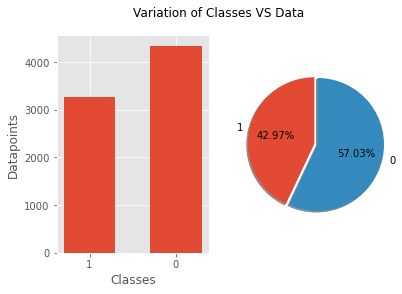

In [11]:
def check_distribution(data):
    from collections import Counter
    targets = np.array(data.target)
    variations = Counter()
    for i in targets:
        variations[str(i)] += 1
        
    variations = dict(variations)
    
    fig, (ax1, ax2) = plt.subplots(1,2)

    ax1.bar(variations.keys(), variations.values(), width=.6)
    ax1.set(xlabel='Classes', ylabel='Datapoints')
    ax2.axis('equal')
    
    ax2.pie(variations.values(),explode=(.05,0), labels=variations.keys(), startangle=90, autopct='%0.2f%%', shadow=True)
    ax2.axis('equal')
    plt.suptitle('Variation of Classes VS Data')
    
    plt.show()
    
check_distribution(train_data)

#### No. of words in a tweet

In [12]:
train_data[train_data['target']==1]['text'].str.split()

0       [Our, Deeds, are, the, Reason, of, this, #eart...
1          [Forest, fire, near, La, Ronge, Sask., Canada]
2       [All, residents, asked, to, 'shelter, in, plac...
3       [13,000, people, receive, #wildfires, evacuati...
4       [Just, got, sent, this, photo, from, Ruby, #Al...
                              ...                        
7608    [Two, giant, cranes, holding, a, bridge, colla...
7609    [@aria_ahrary, @TheTawniest, The, out, of, con...
7610    [M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...
7611    [Police, investigating, after, an, e-bike, col...
7612    [The, Latest:, More, Homes, Razed, by, Norther...
Name: text, Length: 3271, dtype: object

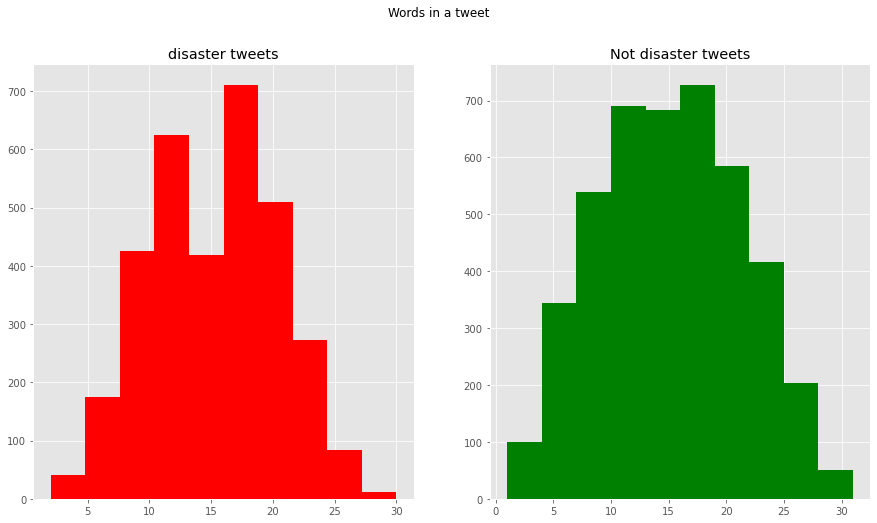

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
tweet_len=train_data[train_data['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train_data[train_data['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()